# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
# Scratch pad

print(df.head())
df.info()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


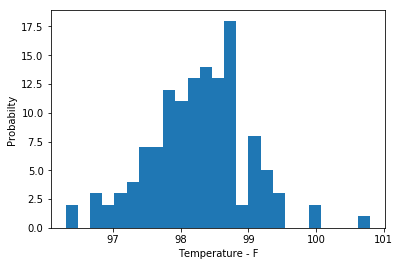

In [9]:
# Graphically verify uniform distribution


# Histogram
import matplotlib.pyplot as plt

plt.hist(df['temperature'],bins=25)
plt.xlabel('Temperature - F')
plt.ylabel('Probabilty')
plt.show()

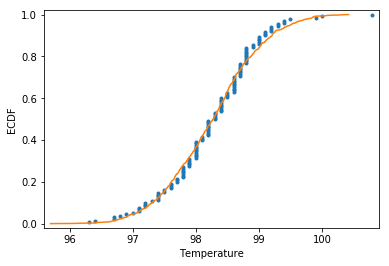

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x,y

def bootstrap_replicate_1d(data, func):
 # Generate bootstrap replicate of 1D data.
 bs_sample = np.random.choice(data, len(data))
 return func(bs_sample)

def draw_bs_reps(data,func,size):

 bs_reps = np.empty(size)
 for i in range(size):
    bs_reps[i] = bootstrap_replicate_1d(data, func)

 return bs_reps

# Use ECDF to check normality distribution

x,y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# comparing to sample normal distr.
sample_temp = np.random.normal(np.mean(df['temperature']),np.std(df['temperature']),size=1000)
x_th, y_th = ecdf(sample_temp)
_ = plt.plot(x_th, y_th)
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [8]:
import numpy as np
#import scipy.stats as st

# Compare max / min with 3 sigma

max_T = np.max(df['temperature'])
min_T = np.min(df['temperature'])

print('Max :',max_T,' Min :',min_T)

print('Mean : ',np.mean(df['temperature']),'  std :',np.std(df['temperature']))

print('6 sigma interval : [',np.mean(df['temperature'])-3*np.std(df['temperature']),',',
      np.mean(df['temperature'])+3*np.std(df['temperature']),' ]')


Max : 100.8  Min : 96.3
Mean :  98.24923076923078   std : 0.7303577789050377
6 sigma interval : [ 96.05815743251567 , 100.44030410594588  ]


In [ ]:
Above Max and min of the distribution are wthin 3 Standard deviation of a normal dustribution. This seems at least approx. uniform

2. At 130 observations its large enough for a z test

3. Is the true population mean really 98.6 degrees F?

Null hypothesis: 98.6 is the true mean for temp population


In [39]:

mean_diff = np.mean(df['temperature']) - 98.6

# shift the sample mean to 98.6 and bootstrap samples after shifting - to simulate the null hypothesis

shift_temp = df['temperature'] - np.mean(df['temperature']) + 98.6

bs_replicates  = draw_bs_reps(shift_temp,np.mean,10000)

# Checking the probability of having a diff as extreme as the observed mean diff between sample and 98.6
p = np.sum(bs_replicates - 98.6 <= mean_diff) / 10000

print('Observed Mean :',mean_diff)
print('probability that mean diff can be as extreme as the observed mean (p-value) :',p)

print('95% Interval of the mean diff')


Observed Mean : -0.35076923076921673
probability that mean diff can be as extreme as the observed mean (p-value) : 0.0


Since p value is 0.0 it proves that 98.6 is not a true mean of the population, as we dont see an value as extreme as the observed mean_diff between the sample and 98.6 evne when the sample has a mean of 98.6. the null hypothesis is rejected

A One sample test is appropritae as we only have a single sample and we are comparing to the mean 


In [ ]:
# Using the frequent approach z test

sem = np.std(df['temperature'])/np.sqrt(len(df['temperature']))

print('six sigma interval based on CLT : [',np.mean(df['temperature'])-3*sem,' , ',np.mean(df['temperature'])+3*sem,' ]')


Above based on CLT 98.6 doesnt even lie within the 3sigma percentile range, hence there is a < .5% chance that 98.6 is a mean of the population and hence null hypothesis can be rejected based on the frequentist approach as well

5. At what temperature should we consider someone's temperature to be "abnormal"?
    a) As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    b) Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws

In [13]:
# shift the sample mean to 98.6 and bootstrap samples after shifting - to simulate the null hypothesis
import scipy.stats as st

noshift_temp = df['temperature'] 

sd = np.std(noshift_temp)
m = np.mean(noshift_temp)

bs_noshift_replicates  = draw_bs_reps(noshift_temp,np.mean,10000)

# standard error of mean for the population represented by the sample

sem_noshift  = np.std(bs_noshift_replicates)
mean_noshift = np.mean(bs_noshift_replicates)

print('sem :',sem_noshift)
print('mean :', mean_noshift)

print("95% certainity that the following temperature would be Abnormal :",mean_noshift+sd*st.norm.ppf(.95))

sem : 0.06432867292636675
mean : 98.24956607692307
95% certainity that the following temperature would be Abnormal : 99.45089771852724


In [12]:
# Determine if there is a significant difference in normal Temp between Males and females

m_temp = df.loc[df.gender == 'M']['temperature']
f_temp = df.loc[df.gender == 'F']['temperature']
mean_diff = np.mean(m_temp) - np.mean(f_temp)
print('Difference in means of Male / female samples (Observed mean difference):',mean_diff)


Difference in means of Male / female samples (Observed mean difference): -0.289230769230727


In [15]:
# H0 : There is a significant difference in male / female normal temp 
# Creating a replicate of differences between the two means to estimate male/female population mean diff

def bs_diff_reps(a,b,size):
  bs_rep = np.empty(size)
  for i in range(size):
     bs_rep[i] =   bootstrap_replicate_1d(a,np.mean) - bootstrap_replicate_1d(b,np.mean)
  return bs_rep

diff_bs_reps = bs_diff_reps(m_temp,f_temp,10000)

#print('Probability of mean differnce in samples as extreme as the observed mean diff  :',np.sum(diff_bs_reps <= mean_diff)/len(diff_bs_reps))

print('Mean Population diff :',np.mean(diff_bs_reps))

# Demonstrate that the mean diff of male / female populations is not significant, as it can be observed between 
# random samples from combined male / female population

def random_set_mean_diff_reps(a,prop, size):
    bs_rep = np.empty(size)
    print('total len :',len(a))
    l = int(prop*len(a))
    for i in range(size):
        s = np.random.choice(a,len(a))
        x = s[:l]                 
        y = s[l:]
        bs_rep[i] = np.mean(x)-np.mean(y)
    return bs_rep

diff_rnd_sample = random_set_mean_diff_reps(df['temperature'],0.5,10000)

print('Probability that random sample diff is different from M/F mean population diff :',
    np.sum(np.sum(diff_rnd_sample <= np.mean(diff_bs_reps)) / len(diff_rnd_sample)))

Mean Population diff : -0.2906146153846151
total len : 130
Probability that random sample diff is different from M/F mean population diff : 0.0134


Since There is a < 5% chance of observing a mean difference as high as the M/F population mean difference within a random sample we have reason to accept the Null hypothesis that there is a significant diff between Male/female normal body temperatures

AttributeError: Unknown property marker

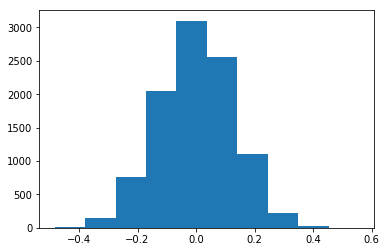

In [17]:
import matplotlib.pyplot as plt
# Get a distribution of combined population samples
plt.hist(diff_rnd_sample, marker='.')
plt.show()